In [30]:
from google.colab import files
uploaded = files.upload()


Saving fear_greed_index.csv to fear_greed_index (2).csv
Saving historical_data.csv to historical_data (2).csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

historical = pd.read_csv("historical_data.csv")
historical

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


In [32]:
fear_greed = pd.read_csv("fear_greed_index.csv")
fear_greed

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [33]:
# Convert fear_greed timestamp to same unit as historical_data
fear_greed['timestamp'] = pd.to_datetime(fear_greed['date'])
historical['timestamp'] = pd.to_datetime(historical['Timestamp IST'], format="%d-%m-%Y %H:%M")

# Merge on date (day-level match)
merged = pd.merge(
    historical,
    fear_greed,
    left_on=historical['timestamp'].dt.date,
    right_on=fear_greed['timestamp'].dt.date,
    how="left"
)
merged

,key_0,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,...,Order ID,Crossed,Fee,Trade ID,Timestamp,timestamp_x,timestamp_y,value,classification,date
0,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,80.0,Extreme Greed,2024-12-02
1,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,80.0,Extreme Greed,2024-12-02
2,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,80.0,Extreme Greed,2024-12-02
3,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,80.0,Extreme Greed,2024-12-02
4,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,80.0,Extreme Greed,2024-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,2025-04-25,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25 15:35:00,2025-04-25,60.0,Greed,2025-04-25
211220,2025-04-25,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25 15:35:00,2025-04-25,60.0,Greed,2025-04-25
211221,2025-04-25,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25 15:35:00,2025-04-25,60.0,Greed,2025-04-25
211222,2025-04-25,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25 15:35:00,2025-04-25,60.0,Greed,2025-04-25


In [34]:
merged.isnull().sum()

,0
key_0,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0


In [35]:
merged = merged.dropna(subset=['timestamp_y', 'value', 'classification','date'])
merged


,key_0,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,...,Order ID,Crossed,Fee,Trade ID,Timestamp,timestamp_x,timestamp_y,value,classification,date
0,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,80.0,Extreme Greed,2024-12-02
1,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,80.0,Extreme Greed,2024-12-02
2,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,80.0,Extreme Greed,2024-12-02
3,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,80.0,Extreme Greed,2024-12-02
4,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,80.0,Extreme Greed,2024-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,2025-04-25,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25 15:35:00,2025-04-25,60.0,Greed,2025-04-25
211220,2025-04-25,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25 15:35:00,2025-04-25,60.0,Greed,2025-04-25
211221,2025-04-25,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25 15:35:00,2025-04-25,60.0,Greed,2025-04-25
211222,2025-04-25,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25 15:35:00,2025-04-25,60.0,Greed,2025-04-25


In [36]:
merged.isnull().sum()

,0
key_0,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0


In [37]:
merged.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
211219,False
211220,False
211221,False
211222,False


In [38]:
merged.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp,timestamp_x,timestamp_y,value
count,211218.000000,2.112180e+05,2.112180e+05,2.112180e+05,211218.000000,2.112180e+05,211218.000000,2.112180e+05,2.112180e+05,211218,211218,211218.000000
mean,11415.047529,4.623341e+03,5.639192e+03,-2.994671e+04,48.549304,6.965470e+10,1.163960,5.628506e+14,1.737745e+12,2025-01-31 12:08:21.724569344,2025-01-30 23:58:26.735221248,51.649656
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12,2023-05-01 01:06:00,2023-05-01 00:00:00,10.000000
25%,4.858550,2.940000e+00,1.937900e+02,-3.760725e+02,0.000000,5.984223e+10,0.016121,2.810000e+14,1.740000e+12,2024-12-31 21:53:45,2024-12-31 00:00:00,33.000000
50%,18.280000,3.200000e+01,5.970200e+02,8.477051e+01,0.000000,7.442939e+10,0.089572,5.620000e+14,1.740000e+12,2025-02-24 18:55:00,2025-02-24 00:00:00,49.000000
75%,101.895000,1.878900e+02,2.058878e+03,9.337697e+03,5.790132,8.335543e+10,0.393774,8.460000e+14,1.740000e+12,2025-04-02 18:22:00,2025-04-02 00:00:00,72.000000
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12,2025-05-01 12:13:00,2025-05-01 00:00:00,94.000000
std,29448.010305,1.042744e+05,3.657557e+04,6.738170e+05,917.989791,1.835714e+10,6.758948,3.257541e+14,8.689946e+09,NaN,NaN,21.012784


In [39]:
merged.shape

(211218, 22)

In [40]:
#TO check Profitability
trader_pnl = merged.groupby("Account")['Closed PnL'].sum()
trader_pnl.sum()

np.float64(10254486.949306)

In [41]:
#Average PnL per trade
avg_pnl = merged.groupby("Account")['Closed PnL'].mean()
avg_pnl

,Closed PnL
Account,
0x083384f897ee0f19899168e3b1bec365f52a9012,419.127768
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,6.577654
0x271b280974205ca63b716753467d5a371de622ab,-18.492043
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,9.951530
0x2c229d22b100a7beb69122eed721cee9b24011dd,52.071011
0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,-38.286626
0x39cef799f8b69da1995852eea189df24eb5cae3c,4.028119
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,161.133275
0x420ab45e0bd8863569a5efbb9c05d91f40624641,520.902331


In [42]:
#comparing Profitability during Fear VS Greed period

sentiment_pnl = merged.groupby("classification")['Closed PnL'].mean()
sentiment_pnl


,Closed PnL
classification,
Extreme Fear,34.537862
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Neutral,34.307718


/tmp/ipython-input-4162890020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged["short_account"] = merged["Account"].str.slice(0, 6) + "..."


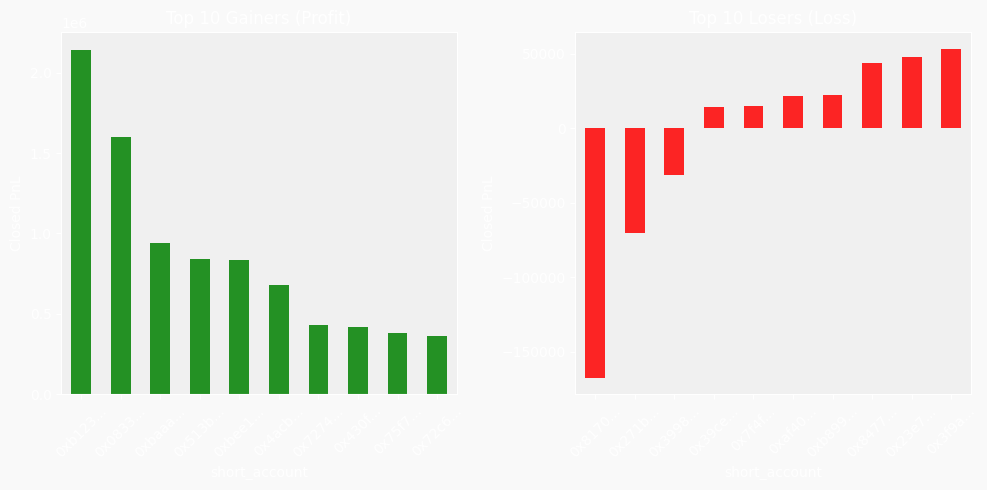

In [43]:
#Making the account name short
merged["short_account"] = merged["Account"].str.slice(0, 6) + "..."

# Group by account and sum closed pnl
Account_pnl = merged.groupby("short_account")["Closed PnL"].sum()

# Top 10 gainers
top10_gainers = Account_pnl.sort_values(ascending=False).head(10)

# Top 10 losers
top10_losers = Account_pnl.sort_values(ascending=True).head(10)

# Create subplots with figure background color
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.patch.set_facecolor('#f9f9f9')  # outside background

# Set Axes background color
axes[0].set_facecolor('#f0f0f0')  # inside first subplot
axes[1].set_facecolor('#f0f0f0')  # inside second subplot

# Plot gainers with some transparency
top10_gainers.plot(kind="bar", ax=axes[0], color="green", alpha=0.85)
axes[0].set_title("Top 10 Gainers (Profit)")
axes[0].set_ylabel("Closed PnL")
axes[0].tick_params(axis="x", rotation=45)

# Plot losers with some transparency
top10_losers.plot(kind="bar", ax=axes[1], color="red", alpha=0.85)
axes[1].set_title("Top 10 Losers (Loss)")
axes[1].set_ylabel("Closed PnL")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


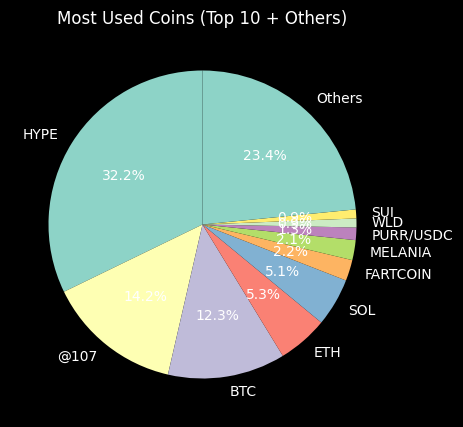

In [44]:
coin_counts = merged["Coin"].value_counts()

top10 = coin_counts.head(10)

# Sum of all the rest
others = pd.Series(coin_counts[10:].sum(), index=["Others"])

# Combine
coin_counts_top = pd.concat([top10, others])

# Plot
coin_counts_top.plot(kind="pie", autopct="%1.1f%%", startangle=90,figsize=(5,5))
plt.title("Most Used Coins (Top 10 + Others)")
plt.ylabel("")
plt.savefig('fig2')
plt.show()



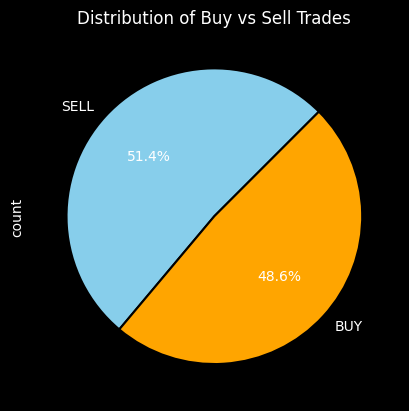

In [45]:
# Count how many trades were Buy vs Sell
side_counts = merged['Side'].value_counts()

side_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'] , wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},startangle=45  )
plt.title("Distribution of Buy vs Sell Trades")
plt.savefig('fig3')
plt.show()

/tmp/ipython-input-4119253101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged["Account"] = merged["Account"].str.slice(0, 6) + "..."


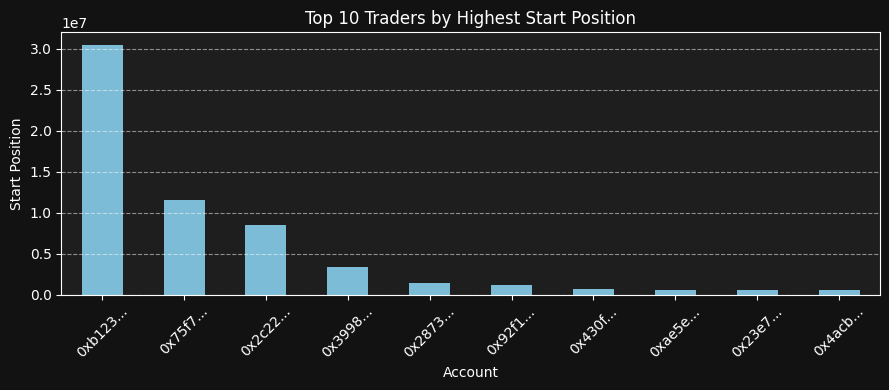

In [46]:
#Making the account name short
merged["Account"] = merged["Account"].str.slice(0, 6) + "..."

# Find maximum start position per trader
max_start_per_trader = merged.groupby('Account')['Start Position'].max()

# Get top 10 traders
top10_traders = max_start_per_trader.sort_values(ascending=False).head(10)

# Create figure and axes
fig, ax = plt.subplots(figsize=(9,4))

# Set dark background color inside plot
ax.set_facecolor('#1e1e1e')
fig.patch.set_facecolor('#121212')
# Plot bar chart with light color bars
top10_traders.plot(kind='bar', color='skyblue', alpha=0.9, ax=ax)

# Formatting
ax.set_title("Top 10 Traders by Highest Start Position", color="white")
ax.set_ylabel("Start Position", color="white")
ax.tick_params(axis='x', colors="white", rotation=45)
ax.tick_params(axis='y', colors="white")
ax.grid(axis='y', linestyle='--', alpha=0.5, color='white')

plt.tight_layout()
plt.savefig('fig4')
plt.show()


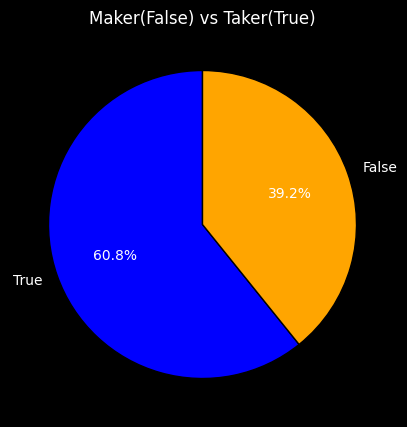

In [50]:
#Trade type counts
trade_type_counts = merged['Crossed'].value_counts()

plt.figure(figsize=(6,5))
plt.pie(
    trade_type_counts,
    labels=trade_type_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors = ['blue','orange'],
    wedgeprops={"edgecolor": "black"}
)
plt.title("Maker(False) vs Taker(True)")
plt.savefig('fig5')
plt.show()

/tmp/ipython-input-1208086856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['Timestamp IST'] = pd.to_datetime(merged['Timestamp IST'], errors='coerce')
/tmp/ipython-input-1208086856.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['date'] = merged['Timestamp IST'].dt.date


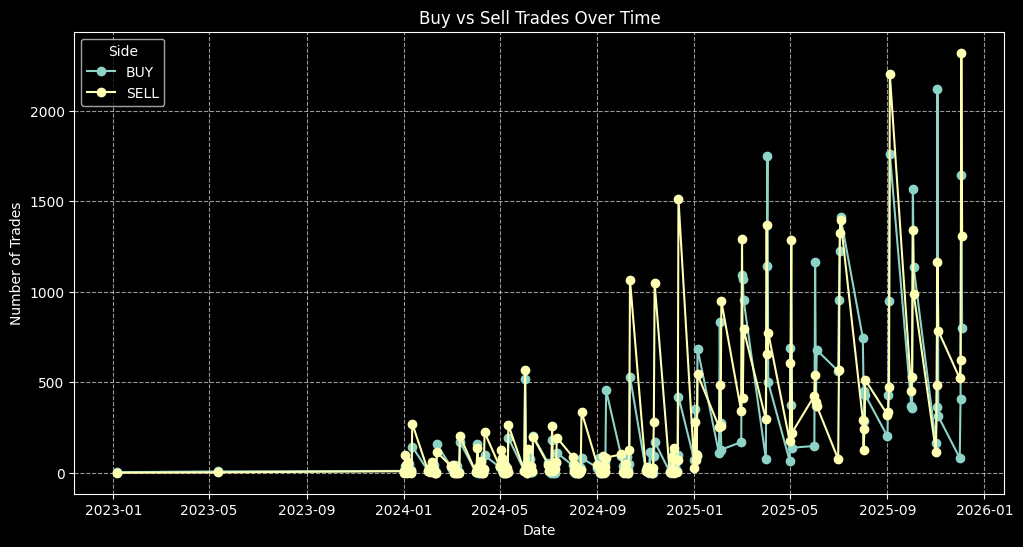

In [51]:
# Convert to datetime
merged['Timestamp IST'] = pd.to_datetime(merged['Timestamp IST'], errors='coerce')


# Convert timestamp to date if not already
merged['date'] = merged['Timestamp IST'].dt.date

# Count trades by date and side
direction_over_time = merged.groupby(['date', 'Side']).size().unstack(fill_value=0)

# Plot
direction_over_time.plot(kind='line', figsize=(12,6), marker='o')
plt.title("Buy vs Sell Trades Over Time")
plt.ylabel("Number of Trades")
plt.xlabel("Date")
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('fig7')
plt.show()


/tmp/ipython-input-2227369538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['hour'] = merged['Timestamp IST'].dt.hour


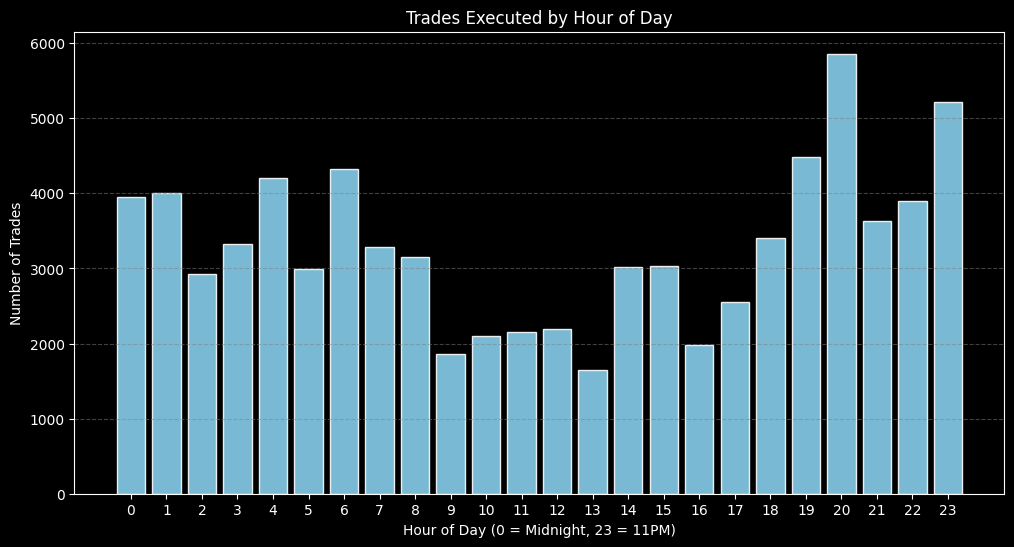

In [52]:
# Extract hour from timestamp
merged['hour'] = merged['Timestamp IST'].dt.hour

# Count trades per hour
trades_by_hour = merged['hour'].value_counts().sort_index()

# Dark background
plt.style.use("dark_background")

plt.figure(figsize=(12,6))

# Bar chart with light-colored bars
plt.bar(trades_by_hour.index, trades_by_hour.values,
        color='skyblue', edgecolor='white', alpha=0.9)

# Titles and labels with light colors
plt.title("Trades Executed by Hour of Day", color="white")
plt.xlabel("Hour of Day (0 = Midnight, 23 = 11PM)", color="white")
plt.ylabel("Number of Trades", color="white")

# X ticks for all 24 hours
plt.xticks(range(0,24), color="white")
plt.yticks(color="white")

# Grid in light color
plt.grid(axis='y', linestyle='--', alpha=0.5, color='gray')

plt.savefig('fig8')
plt.show()


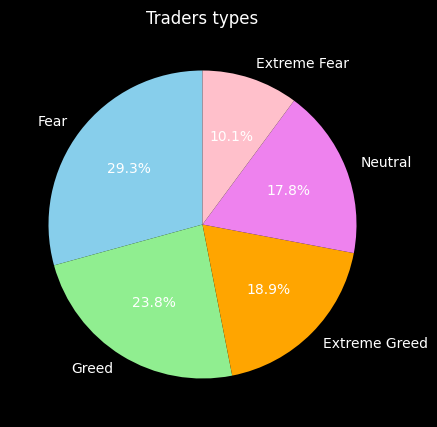

In [53]:
Types_of_Traders = merged['classification'].value_counts()
plt.figure(figsize=(6,5))
plt.pie(
    Types_of_Traders,
    labels=Types_of_Traders.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue','lightgreen','orange','violet','pink'],
    textprops={'color':'white'}
)
plt.title("Traders types")
plt.savefig('fig9')
plt.show()


Account
0xbee1...    1926079.0
0x8477...     962968.0
0xa0fe...     922996.0
0x2873...     915455.0
0xb123...     804583.0
0xbaaa...     679842.0
0x75f7...     622714.0
0x513b...     562654.0
0x47ad...     561869.0
0x4f93...     458624.0
Name: value, dtype: float64


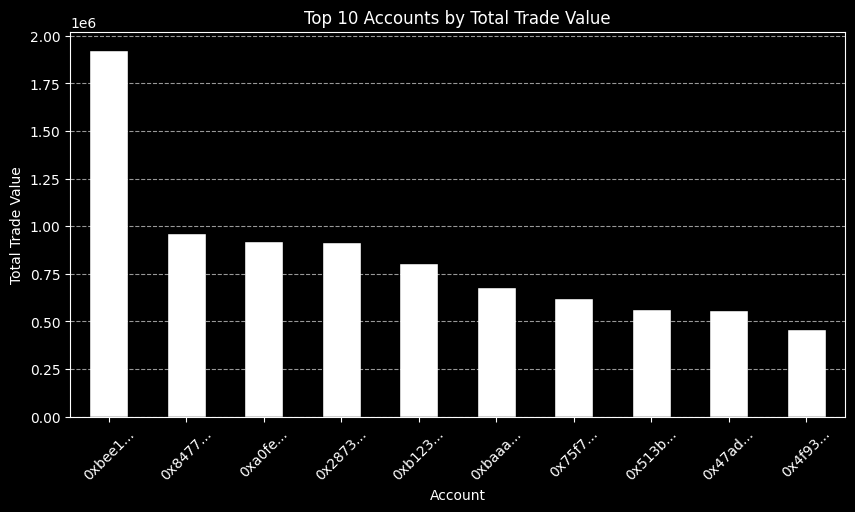

In [54]:
# Group by account and sum the trade value
account_value = merged.groupby("Account")["value"].sum().sort_values(ascending=False)

# Show top 10 accounts
top10_accounts = account_value.head(10)
print(top10_accounts)

# Plot
plt.figure(figsize=(10,5))
top10_accounts.plot(kind="bar", color="white", edgecolor="black")
plt.title("Top 10 Accounts by Total Trade Value")
plt.ylabel("Total Trade Value")
plt.xlabel("Account")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.savefig('fig10')
plt.show()